In [5]:
!pip install pyvirtualdisplay gym > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

指定されたパスが見つかりません。
指定されたパスが見つかりません。


In [1]:
#必要なライブラリを読み込む
import numpy as np
import glob
import os
    
import gym
from gym.wrappers import Monitor
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

In [6]:
#仮想ディスプレイの準備
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900)) #画面サイズ(横,縦)
display.start()

ModuleNotFoundError: No module named 'pyvirtualdisplay'

In [7]:
#MP4ビデオを表示する
#env = wrap_env(env) とすることで通常の実行環境の env を wrap_env(env) で置き換える


def show_video(file_name=None):
  '''
  file_nameの指定があるときはそのファイルを表示する
  ないときは ./video/ の中の最後に作成したmp4ファイルを表示する
  '''
  mp4list = sorted(glob.glob('video/*.mp4'),key=os.path.getmtime)
  if len(mp4list) > 0:
    if file_name==None:
      mp4 = mp4list[-1]
    else:
      mp4 = file_name
    print(mp4)
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True,               #force=True で既存のファイルを上書きする 
                video_callable=(lambda ep: ep % 10 == 0)) #10回に1回保存，デフォルトは0, 1^3, 2^3, 3^3, ...
  return env

In [8]:
# 環境を'CartPole-v0'にする
env = gym.make('CartPole-v0')
env = wrap_env(env) # 仮想ディスプレイの設定
L=np.zeros(100)
for n in range(100):
    state = env.reset() 
    print('初期状態:', env.state)
    print('行動空間:', env.action_space)
    
    for t in range(500):
        env.render()#動画に1フレーム格納
        #ここを書く
        #+++++++++++++++++++++++++++++++++++++++++++++++++++++
        #行動ランダムに選んで更新する
        action = np.random.choice([0, 1])#0か1かランダムに選ぶ
        #+++++++++++++++++++++++++++++++++++++++++++++++++++++
        state, reward, done, info = env.step(action)
        print(f"t = {t}, action = {action}, state = {state}, reward = {reward}, done = {done}")
    
        if done:# done == True ならループを抜ける
            print("Episode finished after {} timesteps".format(t+1))
            break
    L[n]=t
plt.plot(t)
env.close()  #環境を閉じる
show_video() #ビデオを表示

DependencyNotInstalled: Found neither the ffmpeg nor avconv executables. On OS X, you can install ffmpeg via `brew install ffmpeg`. On most Ubuntu variants, `sudo apt-get install ffmpeg` should do it. On Ubuntu 14.04, however, you'll need to install avconv with `sudo apt-get install libav-tools`.

In [ ]:
L

array([19., 15., 18., 11., 12., 12., 25., 12., 11., 42., 13., 39., 12.,
       26., 13., 21., 16., 13., 15., 15., 14., 15., 36., 18., 14., 22.,
       21., 29., 11., 14., 25., 10., 24., 36., 18., 14.,  9., 29., 21.,
       24., 12., 48., 18., 18., 15.,  9., 11., 21., 19., 12., 13., 15.,
       58., 27., 14., 38., 34., 13., 11., 18., 20., 13., 28., 14., 25.,
       18., 37., 42., 11., 45., 17., 12., 12., 12., 28., 33., 14., 31.,
       13., 21., 43., 54., 20., 14., 18., 21., 13., 25., 11., 10., 11.,
       19., 23., 15., 17., 13.,  9., 11., 13., 32.])

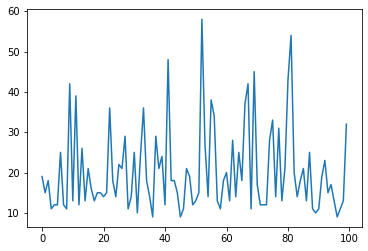

In [ ]:
plt.plot(L)